<a href="https://colab.research.google.com/github/Chubbyman2/Udacity_Tensorflow_Tutorials/blob/master/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U tensorflow_datasets

from __future__ import absolute_import, division, print_function

# Tensorflow
import tensorflow as tf
import tensorflow_datasets as tfds
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Helper Libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (3.1.0)


In [ ]:
# Load dataset, split into test and train sets
dataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset["train"], dataset["test"]

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

num_train_examples = metadata.splits["train"].num_examples
num_test_examples = metadata.splits["test"].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of testing examples: {}".format(num_test_examples))

Number of training examples: 60000
Number of testing examples: 10000


In [ ]:
# Normalization function; 255 -> 1
def normalize(images, labels):
  # tf.cast changes pixel values to 32-bit floats
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies normalize() to each element in the datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

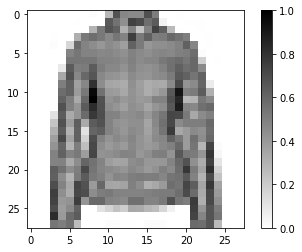

In [ ]:
# # Take a single image, remove the colour dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28, 28))

# Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
model=tf.keras.Sequential([
  # We're converting 1 image to 32 convoluted images; 3x3 kernel; padding keeps same image size
  tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation=tf.nn.relu, input_shape=(28, 28, 1)),
                         
  # Grid is 2x2; stride of 2; reduces the size of all 32 convoluted images
  tf.keras.layers.MaxPooling2D((2, 2), strides=2),

  tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation=tf.nn.relu),
  tf.keras.layers.MaxPooling2D((2, 2), strides=2),
  tf.keras.layers.Flatten(), # Flattens 2D to 1D array
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)                    
])
  
# More later on why we chain multiple convolutional layers together

In [ ]:
# Compiling the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Training the model
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
# You can see the model trains to 97.6%, much higher than the previous 92.5%

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3917 - accuracy: 0.8584
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2580 - accuracy: 0.9055
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2082 - accuracy: 0.9230
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1774 - accuracy: 0.9346
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1502 - accuracy: 0.9447
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1304 - accuracy: 0.9511
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1073 - accuracy: 0.9598
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0934 - accuracy: 0.9665
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0776 - accuracy: 0.9717
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

**Evaluate accuracy**

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print("Accuracy on test dataset: ", test_accuracy)
# Final accuracy is around 92%, still better than the previous 88%
# This is because we used too many epochs that the network started memorizing the data

313/313 [==============================] - 3s 9ms/step - loss: 0.3246 - accuracy: 0.9229
Accuracy on test dataset:  0.9229000210762024


Change the following and see what happens:

1. Lower training epochs

2. Change the number of neurons in the first Dense layer (from 10-512)

3. Add more Dense layers

4. Don't normalize the pixel values

Results:

1. Less training epochs results in there being a smaller difference between tested accuracy and evaluated accuracy.

i.e. epochs=2, (90.4%, 90.3%); epochs=6, (95.1%, 91.6%)

2. More neurons = more accuracy + larger dif between tested and evaluated accuracies.

i.e. neurons=10, (93.6%, 90.9%); neurons=512, (98.5%, 92.1%)

3. More dense layers = less accuracy

i.e. 3 layers, (97.0%, 91.4%); 6 layers, (96.4%, 91.8%)

4. Pixel normalization improves accuracy by a slight amount.

i.e. Not normalized, (97.8%, 91.9%); normalized, (97.6%, 92.3%)